<a href="https://colab.research.google.com/github/shuvookd/XY_dataset/blob/main/XY_dataset(DBScan_with_scratch).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns

In [ ]:
df = pd.read_excel("/content/XY_dataset.xlsx")
df.head()

,X,Y
0,13,7
1,1,0
2,1,1
3,12,8
4,3,1


In [ ]:
EPSI = 2
MIN_POINTS = 4

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


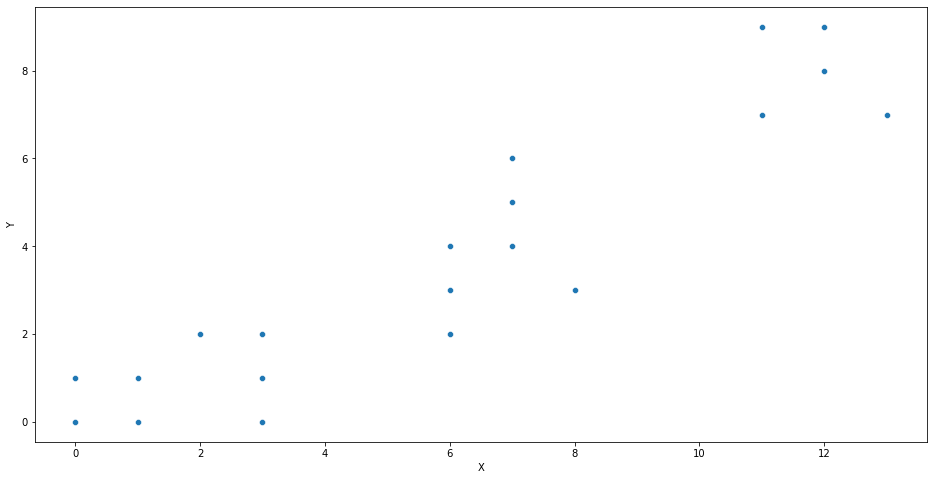

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.scatterplot(df['X'], df['Y'], ax=ax)
plt.show()

In [ ]:
class Point(object):
    def __init__(self, coordinate):
        self.coordinate = coordinate
        self.cluster_idx = None
        
    def is_clustered(self):
        return self.cluster_idx is not None
    
    def cluster(self, cluster_idx):
        self.cluster_idx = cluster_idx


class DBSCAN(object):
    def __init__(self, epsi, min_points):
        self.epsi = epsi
        self.min_points = min_points
    
    @staticmethod
    def _compute_distance(x1, x2):
        return np.sum((x1 - x2)**2)**0.5

    def _find_neighbor_indices(self, core_point, other_points):
        neighbor_indices = []
        
        for idx in range(len(other_points)):
            if self._compute_distance(core_point.coordinate, other_points[idx].coordinate) <= self.epsi:
                neighbor_indices.append(idx)
                
        return neighbor_indices

    def fit(self, df, feature_cols=['X', 'Y']):
        points = []
        for idx, row in df.loc[:, feature_cols].iterrows():
            points.append(Point(row.to_numpy()))
                    
        free_point_indices = set(range(len(points)))

        core_point_indices = set()
        cluster_count = 1

        while len(free_point_indices) > 0:
            if len(core_point_indices) == 0:
                start_idx = random.choice(list(free_point_indices))
                core_point_indices.add(start_idx)
                free_point_indices.remove(start_idx)
                points[start_idx].cluster(cluster_count)

            while len(core_point_indices) > 0:
                picked_core_point_idx = core_point_indices.pop()
                
                neighbor_indices = self._find_neighbor_indices(points[picked_core_point_idx], points)
                
                if len(neighbor_indices) >= (self.min_points - 1):
                    for neighbor_idx in neighbor_indices:
                        if neighbor_idx in free_point_indices:
                            points[neighbor_idx].cluster(cluster_count)
                            if neighbor_idx in free_point_indices:
                                core_point_indices.add(neighbor_idx)
                                free_point_indices.remove(neighbor_idx)
                    
            cluster_count += 1
                    
        return points

In [ ]:
model = DBSCAN(epsi=EPSI, min_points=MIN_POINTS)
points = model.fit(df)

In [ ]:
x = []
y = []
cluster = []

for point in points:
    _x, _y = point.coordinate
    x.append(_x)
    y.append(_y)
    cluster.append(point.cluster_idx)

In [ ]:
new_df = pd.DataFrame({
    'X Axis': x,
    'Y Axis': y,
    'Cluster': cluster
})
new_df

,X Axis,Y Axis,Cluster
0,13,7,3
1,1,0,2
2,1,1,2
3,12,8,3
4,3,1,2
5,12,9,3
6,0,1,2
7,3,2,2
8,11,7,3
9,6,4,1


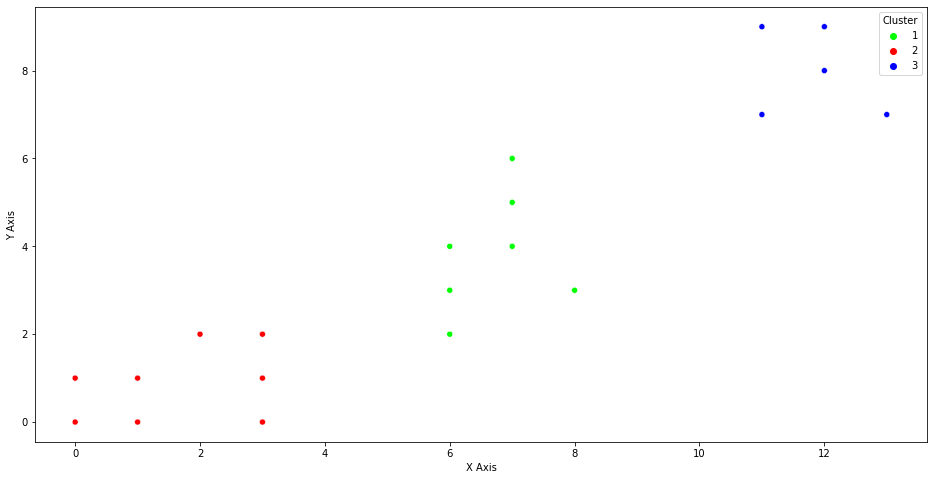

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.scatterplot(data=new_df, x='X Axis', y='Y Axis', hue='Cluster', palette='brg_r', ax=ax)
plt.show()